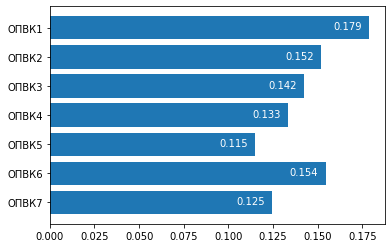

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'C:\\Users\\Ekaterina\\DIPLO\\Importance_DA.xlsx'

# чтение данных из файла
xl = pd.ExcelFile(file)
dfs = []
for name in xl.sheet_names:
    dfs.append(pd.read_excel(file, sheet_name=name).set_index('ОПВК'))    

# дополнение матриц
mtr = np.zeros_like(np.matrix(dfs[0]))
for df in dfs:
    mtr += np.matrix(df.fillna(1))
mtr = mtr / len(dfs)
mtr2 = 1 / mtr
mtr2 = np.tril(mtr2, -1).T
res = np.tril(mtr) + mtr2

# вычисление весов
w = np.prod(res, axis=1) ** (1/res.shape[0])
w = w / sum(w)

# построение гистограммы
plt.barh(np.arange(len(w)), w[::-1])
plt.yticks(np.arange(len(w)), list(dfs[0].columns)[::-1])
for i, v in enumerate(list(dfs[0].columns)[::-1]):
    plt.text(w[6-i] - 0.02, i - 0.06, str(round(w[6-i], 3)), c='w')
plt.savefig('importance_DA2.png')
